# Sampling and the Central Limit Theorem

![sample](https://media.giphy.com/media/OsOP6zRwxrnji/giphy.gif)

# Agenda 

1. Differentiate terms: discriptive/inferential, statistics population/sample, paramater/statistic, sample distribution/sampling distribution
2. Define and calculate standard error
3. Use Numpy to randomly sample a distribution
4. Describe the central limit theorem and connect it to our knowledge of distributions and sampling.
5. Divy Example Continued

## Probability vs Statistics
- Probability starts with known probabilities and obtains how probable any particular observation would be
- Statistics works the other way around. Start with and observations (data) and try to determine its probability

## Descriptive vs Inferential Statistics
- Descriptive Statistics
   > simply describe what is observed. The average height of a high school football team can be directly calculated by measuring all of the current players height.
- Inferential statistics 
    > try to say something general about a larger group of subjects than those we have measured. For example, we would be doing inferential statistics if we wanted to know about the average height of all high school football teams.
    - To put it another way, statistical inference is the process by which we take observations of a subset of a group and generalize to the whole group.

## Population Inference

The mayor's office has hired Flatiron Data Science Immersive students to determine a way to fix traffic congestion. A good starting point is to determine what proportion of the population of Seattle owns a car.

![traffic](https://media.giphy.com/media/3orieWY8RCodjD4qqs/giphy.gif)

In order for us to make any determinations about a population, we must first get information about it.

Because it's usually completely impractical to get data about *everyone* in a population, we must take a sample.

## Key Terms
 - the entire group is known as the **population**  
 - the subset is a known as the **sample**


![pop](./img/sample_pop.png)

- We would use samples if the population is:
    - Too big to enumerate
    - too difficult/time consuming or expensive to sample in its entirety.

**Random sampling is not easy to do**  
Continuing our Seattle car example, how would we take a sample? 

Here are two strategies we might employ:

* Stand outside of Flatiron at 12 pm and ask random people until *n* responses


* Go to a randomly assigned street corner and at a random time and ask *n* people if they own a car

Which strikes you as better?

What do we want our sample to look like?

In particular, what relationship do we want between the sample and the population? What steps can we take to improve our odds of success in achieving this?

# Discussion

![talk amongst yourselves](https://media.giphy.com/media/l2SpQRuCQzY1RXHqM/giphy.gif)

The first way of sampling is considered a convenience sample.
You are going about collection in a non-random manner

# Sample Conditions

1. The sampled observations must be independent
    - The sampling method must be random  


2. Sample size distribution:
    - The more skewed the sample the larger samples we need. 
    - n > 30 is considered a large enough sample unless there is extreme skew

## Population v Sample Terminology
Characteristics of populations are called **parameters**

Characteristics of a sample are called **statistics**

A sample statistic is a **point estimate** of the population parameter

![imgsample](./img/sample_stats.png)

# A Simulation to Reinforce Our Definitions

Let's create a population of systolic blood pressure of adult males in Chicago, assuming a mean of 114 mmHg with a standard deviation of 11 mmHg.  We will also assume the adult male population to be 1.5 million. 

It is impossible to measure the systolic blood pressure of every man in Chicago, but let's assume multiple investigations have led to the conclusion numbers above. These are therefore estimators of the population parameter.

$\Large\hat\mu = 114$  
$\Large\hat\sigma = 11$



NameError: name 'sys_pop' is not defined

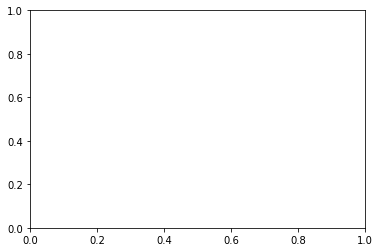

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

pop = int(1.5*10**6)
# Use numpy to generate a normal distribution with the paramters above

fig, ax = plt.subplots()

sns.kdeplot(sys_pop, ax=ax, shade=True)
ax.set_title('Distribution of Adult Male Systolic Blood Pressure')
ax.set_xlabel('Systolic BP')

Let's then imagine we develop an effective manner of random sampling, and simulate with numpy. Our sample size is 40 people.


In [ ]:
sample_size = 40
sample = np.random.choice()

# We can look at the distribution of the values in the sample.

In [ ]:
fig, ax = plt.subplots()
sns.distplot(sample, ax=ax, bins=15)
ax.set_title('Sample Distribution of Systolic BP Measurements')

We can then calculate the sample statistics:

In [ ]:
print(f'Sample mean: {sample.mean()}')
print(f'Sample standard deviation: {sample.std()}')
print(f'Sample median: {np.median(sample)}')

If we repeated this process, taking samples of the population repeatedly, we would get an array of sample statistics.

In [2]:
number_of_samples = 1000
sample_size = 40
sample_stats = []

for _ in range(number_of_samples):
    # collect the mean of each of the 1000 samples in sample stats
    pass


The collection of sample stats represents our __sampling distribution__

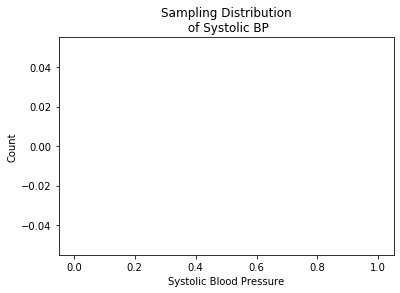

In [4]:
fig, ax = plt.subplots()
ax.hist(sorted(sample_stats), bins=20)
ax.set_title('Sampling Distribution\n of Systolic BP')
ax.set_xlabel("Systolic Blood Pressure")
ax.set_ylabel('Count');

An interesting property of this sampling distribution:
    
As we continue to sample, the mean of the sampling distribution gets closer and closer to the population mean.

### Standard Error of the Mean

The standard error of the mean is the standard deviation of the sampling distribution.
The issue is that a sample is not an exact replica of the population. We need to account for that fact in order to make our estimate of the $\mu$ value possible. Let's break it down:

**Population sigma** <br/>

$\large\sigma _{x} = \frac{\sigma }{\sqrt{n}}$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population

### What is the standard error of the mean for systolic blood pressure example with known mean and standard deviation, assuming a sample size of 40

**What if we do not know the population sigma?**<br>
If we do not know the population standard deviation, we can approximate it by using the sample standard deviation.

$\large\sigma _{x} ≈ \frac{s}{\sqrt{n}}$

* s = sample standard deviation

**Sample size impact on standard error of mean**<br>

How should sample size influence standard error of the mean?

It will get *smaller* as sample size *increases*

![error](./img/diminishing_error.png)  
Important implication: The Standard Error of the mean remains the same as long as the population standard deviation is known and sample size remains the same.


In [7]:
def standard_error(distribution, largest_sample_size, population_std=None):
    
    '''
    Calculate the standard errors for a range of sample sizes
    to demonstrate how standard error decreases when sample 
    size increases.
    '''
 
    std_errors = {}
    
    for sample_size in range(50,largest_sample_size+1):
        sample = np.random.choice(distribution, size=sample_size, replace=True)
        # Standard error with sample distribution standard deviation 
        # in place of population
        if population_std == None:
            std_err = np.std(sample)/np.sqrt(sample_size)
            std_errors[sample_size] = std_err
        
        else:
            std_err = population_std/np.sqrt(sample_size)
            std_errors[sample_size] = std_err
        
    return std_errors
    

In [8]:
std_errors = standard_error(sys_pop, 1000)

fig, ax = plt.subplots()

sns.scatterplot(list(std_errors.keys()), list(std_errors.values()))

NameError: name 'sys_pop' is not defined

In [9]:
std_errors = standard_error(sys_pop, 1000, population_std=114)

fig, ax = plt.subplots()

sns.scatterplot(list(std_errors.keys()), list(std_errors.values()))

NameError: name 'sys_pop' is not defined

# Word Exercise 
Put the variables in the correct place.


In [10]:

var_1 = 'population'
var_2 = 'sample'
var_3 = 'point estimate'
var_4 = 'statistic'
var_5 = 'parameter'
var_6 = 'sampling'


print(f"""We sampled 40 bee hives and calcuted the mean colony population 
          to be 75,690 bees. 75,690 is a {var_1} of the population paramter\n""")

print(f"""We repeatedly sample 40 people at random from Seattle and 
        measure their heart rate,then calculate the mean of each sample. 
        We call the plot of this collection of statistics
        the {var_2} distribution.
        """)

print(f"""There are exactly 58 Javan Rhino's left in the wild. 
        Their mean length has been measured accurately at 5 feet.
        This mean length is considered a population {var_3}. 
        """)

print(f"""If we plot a histogram of individual pistil lengths 
      measured on 50 hibiscus flowers, we would be plotting the distribution 
      of an attribute of our {var_4} of hibiscus flowers. 
        """)

print(f"""Since every restaurant in Chicago is required by law to register
        with the city, we can accurately count the number of active pizza restaurants
         operating right now.  This group represents the {var_5} of actively 
        operating, registered pizza restaurants in Chicago.
    """)

print(f"""The mean number of hourly hits to Jelle's Marble Racing website 
            randomly sampled across a seven day period represents a sample
            {var_6}.
        """)

We sampled 40 bee hives and calcuted the mean colony population 
          to be 75,690 bees. 75,690 is a population of the population paramter

We repeatedly sample 40 people at random from Seattle and 
        measure their heart rate,then calculate the mean of each sample. 
        We call the plot of this collection of statistics
        the sample distribution.
        
There are exactly 58 Javan Rhino's left in the wild. 
        Their mean length has been measured accurately at 5 feet.
        This mean length is considered a population point estimate. 
        
If we plot a histogram of individual pistil lengths 
      measured on 50 hibiscus flowers, we would be plotting the distribution 
      of an attribute of our statistic of hibiscus flowers. 
        
Since every restaurant in Chicago is required by law to register
        with the city, we can accurately count the number of active pizza restaurants
         operating right now.  This group represents the parameter of ac


# 2. Use numpy to randomly sample a distribution


## Group Exercise

Below, we have four different sample scenarios.  Each group will code out the following: 

You are given a "population" to sample from based on the type of distribution.

1. Take a random sample of size n, where n > 30, from the population and calculate the mean of that population.

2. Repeat the sample n numbers of times (n = 1000). 

3. Plot the sampling distribution

In [12]:
%load_ext autoreload
%autoreload 2
from src.student_list import student_first_names


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
student_first_names

['Ali',
 'Andrew',
 'Angie',
 'Elena',
 'Hunter',
 'Jeffrey',
 'Jonathan',
 'Josh',
 'Karim',
 'Matthew',
 'Ozair',
 'Paul',
 'Prabhakar',
 'Reuben',
 'Sam',
 'Sindhu',
 'William']

In [15]:
qpe = student_first_names
for n in range(1,4):
    group = np.random.choice(student_first_names, 4, replace=False)
    print(f'group {n}', group)
    for name in list(group):
        qpe.remove(name)
print(f"group 4: {qpe}")

group 1 ['Karim' 'Matthew' 'William' 'Josh']
group 2 ['Ali' 'Jonathan' 'Elena' 'Sindhu']
group 3 ['Andrew' 'Paul' 'Reuben' 'Prabhakar']
group 4: ['Angie', 'Hunter', 'Jeffrey', 'Ozair', 'Sam']


## Group 1:

A bowler on the PBA rolls a strike 60% of the time. The population strikes of all games ever bowled is stored in in the population variable below.


In [ ]:
population = np.random.binomial(12, .6, 10000)
fig, ax = plt.subplots()
ax.bar(range(0,12), np.unique(population, return_counts=True)[1])
ax.set_title('Strikes Per Game')

## Group 2:

Stored in the variable below is the number of pieces of mail that arrive per week at your door for each of the 4500 weeks in your life.  

In [ ]:
mail_population = np.random.poisson(3, 4500)
counts = np.unique(mail_population, return_counts=True)

fig, ax = plt.subplots()
ax.bar(np.unique(counts[0]), counts[1])
ax.set_title('Distribution of Pieces of Mail/Week')
ax.set_xlabel("Pieces of Mail")

# Group 3 

The population data for the number of minutes between customers arriving in a Piggly Wiggly is stored in the variable piggly_population.

In [ ]:
# on average, 20 customers enter per hour
piggly_population = np.random.exponential(1/(20/60), size=10000)
fig, ax = plt.subplots()
ax.hist(piggly_population, bins = 50, normed=True)
ax.set_title('Sample Means of Time Between Piggle Wiggly Customers')
ax.set_xlabel('Minutes');

# 3. Central Limit Theorem

If we take repeated samples of a population, the sampling distribution of sample means will approximate to a normal distribution, no matter the underlying distribution!

## $E(\bar{x_{n}}) = \mu$

as n --> "large"

[good D3 example](https://seeing-theory.brown.edu/probability-distributions/index.html)

[good video demonstration](https://www.youtube.com/watch?v=jvoxEYmQHNM)


Let's look at an example taken from the ubiquitous Iris dataset. This histogram represents the distributions of sepal length:


![probgif](./img/probability-basics.gif)

https://www.kaggle.com/tentotheminus9/central-limit-theorem-animation

As we will see in hypothesis testing, pairing this theorem with the Empirical rule will be very powerful.

![empirical](img/empirical_rule.png)



Knowing that any sampling distribtion, no matter the underlying population distribution, will approach normality, we will be able to judge, given the empirical rule, how rare a given sample statistic is.  

## Bike Example
Capital bike share is trying to figure out their pricing for members versus non-members. The first step in their analysis is to see if members vs non-members ride for different amounts of time per ride.

Let's head over [here](https://s3.amazonaws.com/capitalbikeshare-data/index.html) for some DC bike data!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline


In [ ]:
! curl https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2020_Q1.zip -o 'data/divy_2020_Q1.zip'
! unzip divy_2020_Q1.zip -d data

In [ ]:
from src.data_import import prep_divy

divy_trips = prep_divy()


Remember the distribution has heavy right skew. 
Before proceeding, let's remove outliers which are greater than 3 standard deviations of the mean


In [ ]:
# Store the number of rides in the original dataframe for comparison
original_number_of_rides = divy_trips.shape[0]
original_number_of_rides
# your code here


In [ ]:
divy_trips.shape[0]

In [ ]:
# Divide the data set into casual and member groups

casual = None
member = None

In [ ]:
# Calculate the mean and standard deviation of each group's ride times
# Your code here

print(f"Casual mean ride time: {casual_mean_ride_time}")
print(f"Member mean ride time: {member_mean_ride_time}")

print(f"Casual std ride time: {casual_std_ride_time}")
print(f"Member mean ride time: {member_std_ride_time}")

In [ ]:
# Using np.random.choice take a sample of 40 ride times from the casual group
np.random.seed(42)
# Your code here

In [ ]:
# Calculate the mean and std of the casual sample (sample statistics)

np.random.seed(42)

casual_sample_mean = None
casual_sample_std = None
print(f"casual_sample mean: {casual_sample_mean}")
print(f"casual_sample std: {casual_sample_std}")


In [ ]:
# Using np.random.choice take a sample of 40 ride times from the member group
np.random.seed(42)



In [ ]:
# Calculate the mean and std of the member sample (sample statistics)
member_sample_mean = None
member_sample_std = None
print(f"member_sample mean: {member_sample_mean}")
print(f"member_sample std: {member_sample_std}")

In [ ]:
# Repeat the sample 1000 times for both groups, and store the means of each of 1000 samples in two lists.


In [ ]:
# plot the sampling distribution of both the casual and member groups

fig, ax = plt.subplots()

ax.hist(member_means, bins=100)
ax.hist(casual_means, bins=100);

# There are three ways we could calculate the Standard Error of the Mean
    1. Since we are sampling from a large population of rides, we could calculate it using the population std.
    2. Since we used numpy to randomly sampled the means, we could take the mean of the sample (should be very close to the number calculated above)
    3. We could use our original samples to approximate the SEM. 


In [ ]:
# 1. Calculate it using the population std for both member and casual.


In [ ]:
# 2. Calculate the standard error of the mean of both populations using the randomly generated samples


In [ ]:
# 3. Use our samples to approximate the SEM for both casual and member

In [ ]:
# Calculate the z_score of the casual sample wrt the member sampling distribution

In [ ]:
# Your Code Here